In [ ]:
#yaha se code lo ye pura running hai
#sabse sahi code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 1. Load CSV files
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

# 2. Separate features and labels
train_x = train_df.drop('label', axis=1).values
train_y = train_df['label'].values

test_x = test_df.drop('label', axis=1).values
test_y = test_df['label'].values

# 3. Normalize pixel values and reshape
train_x = train_x / 255.0
test_x = test_x / 255.0

train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

# 4. Build the model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

# 5. Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 6. Train the model
model.fit(train_x, train_y, epochs=5, validation_split=0.1)

# 7. Evaluate
loss, acc = model.evaluate(test_x, test_y)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

# 8. Prediction
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

predictions = model.predict(test_x[:1])
predicted_label = labels[np.argmax(predictions)]

print("Predicted Label:", predicted_label)
plt.imshow(test_x[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()





In [ ]:
import pandas as pd
import numpy as np

# Load data
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

# Split into features and labels
train_x = train_df.iloc[:, 1:].values / 255.0
train_y = train_df.iloc[:, 0].values

test_x = test_df.iloc[:, 1:].values / 255.0
test_y = test_df.iloc[:, 0].values

# Reshape for CNN input
train_x = train_x.reshape(-1, 28, 28, 1).astype(np.float32)
test_x = test_x.reshape(-1, 28, 28, 1).astype(np.float32)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_x, train_y, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.8170 - loss: 0.5207 - val_accuracy: 0.8877 - val_loss: 0.3117
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 39ms/step - accuracy: 0.9011 - loss: 0.2725 - val_accuracy: 0.8904 - val_loss: 0.2943
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.9185 - loss: 0.2202 - val_accuracy: 0.9040 - val_loss: 0.2775
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 40ms/step - accuracy: 0.9340 - loss: 0.1823 - val_accuracy: 0.9093 - val_loss: 0.2670
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 41ms/step - accuracy: 0.9456 - loss: 0.1545 - val_accuracy: 0.9129 - val_loss: 0.2623


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9143 - loss: 0.2521
Test Accuracy: 91.65%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


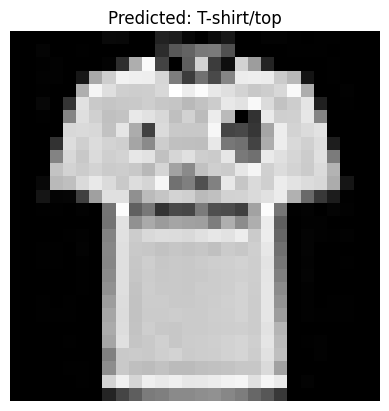

In [4]:
# Evaluate
loss, accuracy = model.evaluate(test_x, test_y)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predict a sample
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import matplotlib.pyplot as plt
pred = model.predict(test_x[:1])
predicted_label = labels[np.argmax(pred)]

plt.imshow(test_x[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Actual Label: T-shirt/top
Predicted Label: Sandal


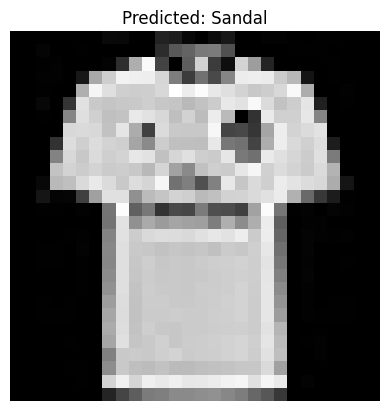

In [6]:
target_label_index = labels.index('T-shirt/top')  # Change 'sneaker' to any other category

# Loop to find the first test image of that category
for i in range(len(test_y)):
    if test_y[i] == target_label_index:
        test_image = test_x[i].astype('float32') / 255.0
        test_image = test_image.reshape(1, 28, 28, 1)

        prediction = model.predict(test_image)
        predicted_label = labels[np.argmax(prediction)]

        print(f"Actual Label: {labels[test_y[i]]}")
        print(f"Predicted Label: {predicted_label}")

        plt.imshow(test_x[i], cmap='gray')
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()
        break  # Stop after showing the first match